# Step 3: EDA

## A. Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## B. Grocery Market Data

In [40]:
# Create dataframe from usda_final.csv
usda_df = pd.read_csv('usda_final.csv')

# Preview
usda_df.head()

,product,region,year_month,mean_weighted_price
0,apples,ALASKA,2023-01,2.028194
1,apples,ALASKA,2023-02,2.141250
2,apples,ALASKA,2023-03,1.806944
3,apples,ALASKA,2023-04,1.928929
4,apples,ALASKA,2023-05,2.220833


In [7]:
# What products are listed? 
usda_df['product'].unique().tolist()

['apples per pound',
 'beans per pound',
 'chicken fresh bagged',
 'ground beef',
 'lettuce per pound',
 'pork breakfast sausage',
 'pork chops',
 'pork sliced bacon',
 'pork spiral ham',
 'potatoes per pound',
 'tomatoes per pound']

In [8]:
# Further normalize product names 
usda_df['product'] = usda_df['product'].replace({
    'apples per pound': 'apples', 
    'beans per pound': 'beans',
    'chicken fresh bagged': 'chicken',
    'lettuce per pound': 'lettuce',
    'pork breakfast sausage': 'breakfast sausage',
    'pork sliced bacon': 'bacon', 
    'pork spiral ham': 'ham', 
    'potatoes per pound': 'potatoes', 
    'tomatoes per pound': 'tomatoes'
})

usda_df['product'].unique().tolist()

['apples',
 'beans',
 'chicken',
 'ground beef',
 'lettuce',
 'breakfast sausage',
 'pork chops',
 'bacon',
 'ham',
 'potatoes',
 'tomatoes']

In [9]:
# What regions are listed?
usda_df['region'].unique().tolist()

['ALASKA',
 'HAWAII',
 'MIDWEST U.S.',
 'NATIONAL',
 'NORTHEAST U.S.',
 'NORTHWEST U.S.',
 'SOUTH CENTRAL U.S.',
 'SOUTHEAST U.S.',
 'SOUTHWEST U.S.']

### i. Summary Statistics by Product

In [10]:
usda_df.groupby('product')['mean_weighted_price'].describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
apples,81.0,1.739312,0.278635,1.303333,1.524867,1.706667,1.916111,2.390000
bacon,108.0,5.985884,0.795722,4.822500,5.460250,5.812000,6.437625,8.442500
beans,70.0,1.902769,0.501426,0.890000,1.609667,1.768750,1.994500,3.990000
breakfast sausage,105.0,4.073686,0.707012,3.180000,3.664000,3.846000,4.242500,6.430000
chicken,104.0,1.315342,0.434535,0.912917,1.047188,1.152917,1.358125,3.280000
ground beef,108.0,4.606478,0.521921,3.718472,4.300646,4.530278,4.758403,7.644375
ham,80.0,2.956440,1.161498,0.990000,2.236250,2.828750,3.476667,7.190000
lettuce,41.0,1.784421,0.355720,1.225000,1.500000,1.745000,1.900000,2.990000
pork chops,108.0,3.293938,0.469222,2.635000,2.984187,3.198375,3.491280,5.378600


Which products experience the most volatility (i.e. have the highest standard deviation)? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ham'),
  Text(1, 0, 'bacon'),
  Text(2, 0, 'breakfast sausage'),
  Text(3, 0, 'ground beef'),
  Text(4, 0, 'beans'),
  Text(5, 0, 'tomatoes'),
  Text(6, 0, 'pork chops'),
  Text(7, 0, 'chicken'),
  Text(8, 0, 'lettuce'),
  Text(9, 0, 'apples'),
  Text(10, 0, 'potatoes')])

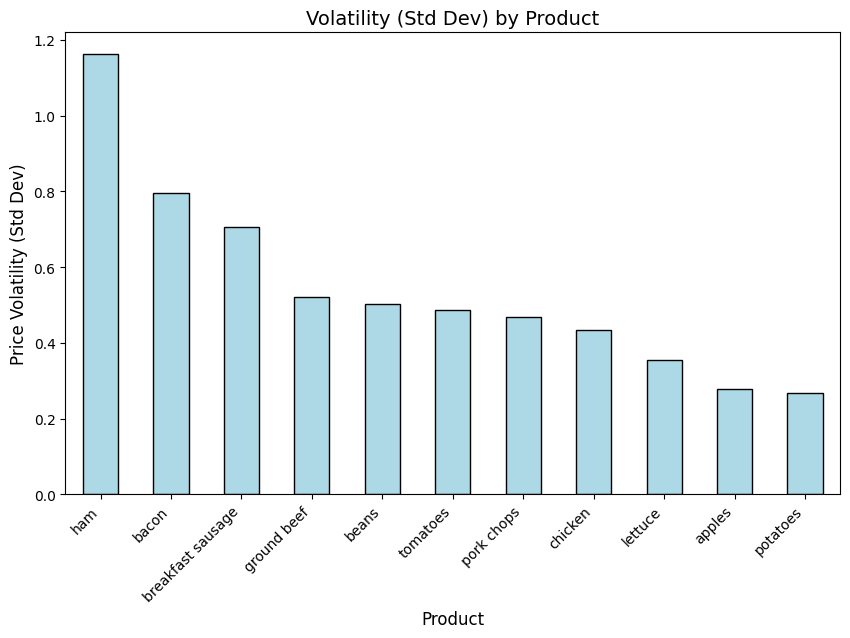

In [11]:
# Group by product and get standard deviation
product_volatility = usda_df.groupby('product')['mean_weighted_price'].std()

# Sort the products by standard deviation (volatility) in descending order
sorted_volatility = product_volatility.sort_values(ascending=False)

# Create a bar chart to visualize the volatility
plt.figure(figsize=(10, 6))
sorted_volatility.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title('Volatility (Std Dev) by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Price Volatility (Std Dev)', fontsize=12)
plt.xticks(rotation=45, ha='right')


It looks like meat products - and pork products specifically - experienced the most volatility in 2023.  

Do Alaska and Hawaii really increase the standard deviation and max price of (i.e. notably skew) the data?  I have to imagine they might.  Should they be not considered?  Or considered in their own category? 

### ii. Summary Statistics by Region

In [12]:
usda_df.groupby('region')['mean_weighted_price'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
ALASKA,99.0,3.746290,1.880468,1.265556,2.169889,3.465000,4.972833,8.4425
HAWAII,87.0,3.768066,1.858366,0.990000,2.240000,3.280000,5.271667,8.2050
MIDWEST U.S.,117.0,2.733439,1.535606,0.776667,1.463333,2.028958,3.837500,6.5475
NATIONAL,117.0,2.834522,1.471215,1.023333,1.632000,2.466000,3.846000,6.7150
NORTHEAST U.S.,116.0,2.949142,1.523891,1.046250,1.623125,2.302062,4.265000,6.4550
NORTHWEST U.S.,106.0,2.934997,1.605649,0.856000,1.492500,2.674444,4.175069,7.1125
SOUTH CENTRAL U.S.,110.0,2.777662,1.541881,0.918667,1.498906,2.485000,3.796875,7.1900
SOUTHEAST U.S.,109.0,2.884321,1.521517,0.913333,1.706667,2.540000,3.925000,7.0475
SOUTHWEST U.S.,104.0,2.794477,1.590539,0.900000,1.432760,2.211458,4.049975,6.4375


It would appear that Alaska and Hawaii do have the two highest standard deviations and max prices of anywhere in the U.S., which makes sense.  I suppose the question is: Are they far enough outside the bounds of the data on the contiguous U.S. as to be considered as skewing the data?  

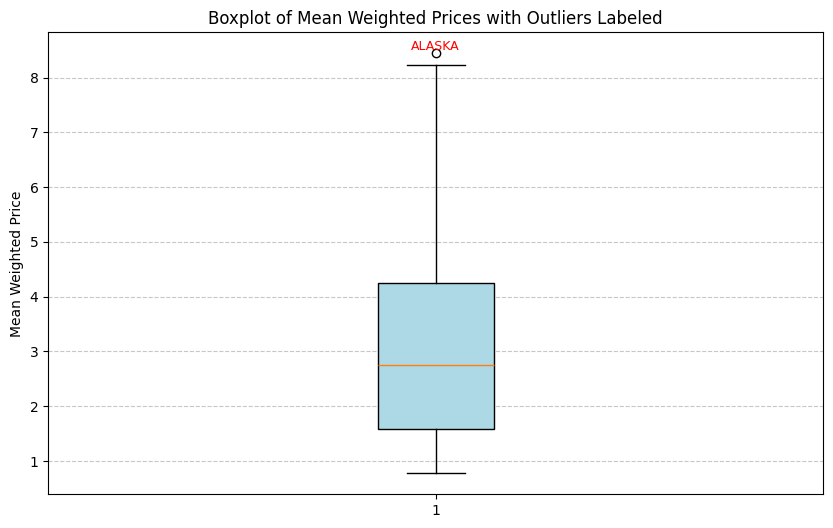

In [13]:
# Visualize for outliers

# Generate the boxplot
plt.figure(figsize=(10, 6))
box = plt.boxplot(usda_df['mean_weighted_price'].dropna(), patch_artist=True)

# Set the box color to light blue for all boxes
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')

# Identify the outliers by comparing the values beyond the whiskers
outliers = usda_df['mean_weighted_price'][usda_df['mean_weighted_price'] > box['whiskers'][1].get_ydata()[1]]

# Get the regions corresponding to the outliers
outlier_regions = usda_df.loc[usda_df['mean_weighted_price'].isin(outliers), 'region']

# Annotate the outliers
for i, outlier in enumerate(outliers):
    region = outlier_regions.iloc[i]
    # Adding text annotations to the plot
    plt.text(1, outlier, f'{region}', horizontalalignment='center', verticalalignment='bottom', fontsize=9, color='red')

# Formatting the plot
plt.ylabel('Mean Weighted Price')
plt.title('Boxplot of Mean Weighted Prices with Outliers Labeled')
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [14]:
# Filter outliers using IQR

# Calculate the IQR for 'mean_weighted_price'
Q1 = usda_df['mean_weighted_price'].quantile(0.25)
Q3 = usda_df['mean_weighted_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-2.4033333333333333
8.236666666666668


So, Alaska falls outside the upper bound, and Hawaii is one one-hundredth away from being on the upper bound.  This makes sense from what we know about food prices in AK & HI as compared to the contiguous U.S. However, I believe the other datasets look at the U.S. as a whole, so I'm going ot leave AK & HI in this dataset for now. 

We looked at which products experienced the most price volatility.  I suppose we could do the same for regions.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ALASKA'),
  Text(1, 0, 'HAWAII'),
  Text(2, 0, 'NORTHWEST U.S.'),
  Text(3, 0, 'SOUTHWEST U.S.'),
  Text(4, 0, 'SOUTH CENTRAL U.S.'),
  Text(5, 0, 'MIDWEST U.S.'),
  Text(6, 0, 'NORTHEAST U.S.'),
  Text(7, 0, 'SOUTHEAST U.S.'),
  Text(8, 0, 'NATIONAL')])

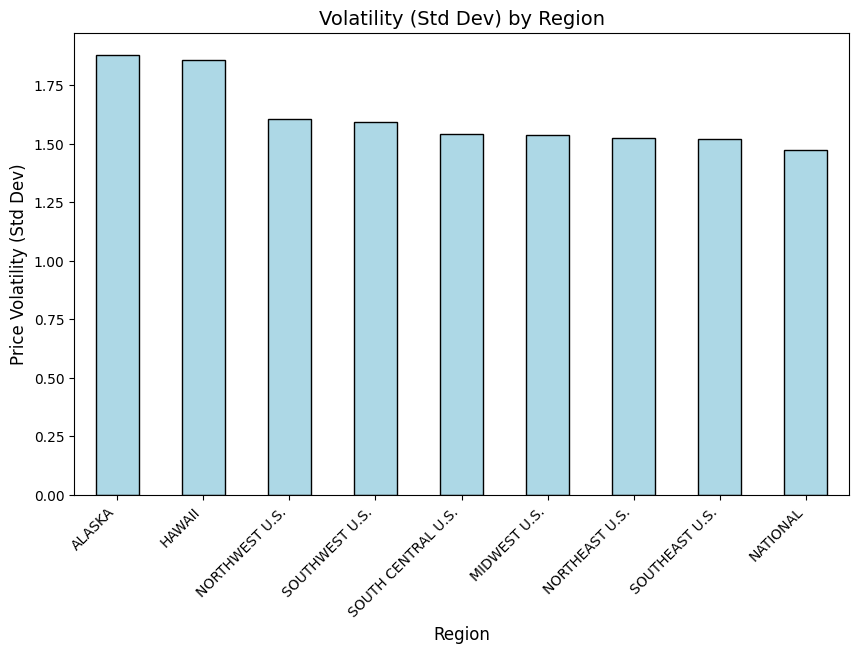

In [15]:
# Group by region and get standard deviation
region_volatility = usda_df.groupby('region')['mean_weighted_price'].std()

# Sort the products by standard deviation (volatility) in descending order
sorted_volatility = region_volatility.sort_values(ascending=False)

# Create a bar chart to visualize the volatility
plt.figure(figsize=(10, 6))
sorted_volatility.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title('Volatility (Std Dev) by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price Volatility (Std Dev)', fontsize=12)
plt.xticks(rotation=45, ha='right')


### iii. Average Price Trends Over Time

In [16]:
usda_df.groupby('year_month')['mean_weighted_price'].mean()

year_month
2023-01    2.805171
2023-02    2.892015
2023-03    2.799442
2023-04    2.787122
2023-05    2.748342
2023-06    2.778918
2023-07    2.948772
2023-08    2.923202
2023-09    2.985663
2023-10    4.086828
2023-11    3.849505
2023-12    3.724132
Name: mean_weighted_price, dtype: float64

Let's look at a line plot to visualize these average price trends over time.

([<matplotlib.axis.XTick at 0x1166a54c0>,
 [Text(0, 0, '2023-01'),
  Text(1, 0, '2023-02'),
  Text(2, 0, '2023-03'),
  Text(3, 0, '2023-04'),
  Text(4, 0, '2023-05'),
  Text(5, 0, '2023-06'),
  Text(6, 0, '2023-07'),
  Text(7, 0, '2023-08'),
  Text(8, 0, '2023-09'),
  Text(9, 0, '2023-10'),
  Text(10, 0, '2023-11'),
  Text(11, 0, '2023-12')])

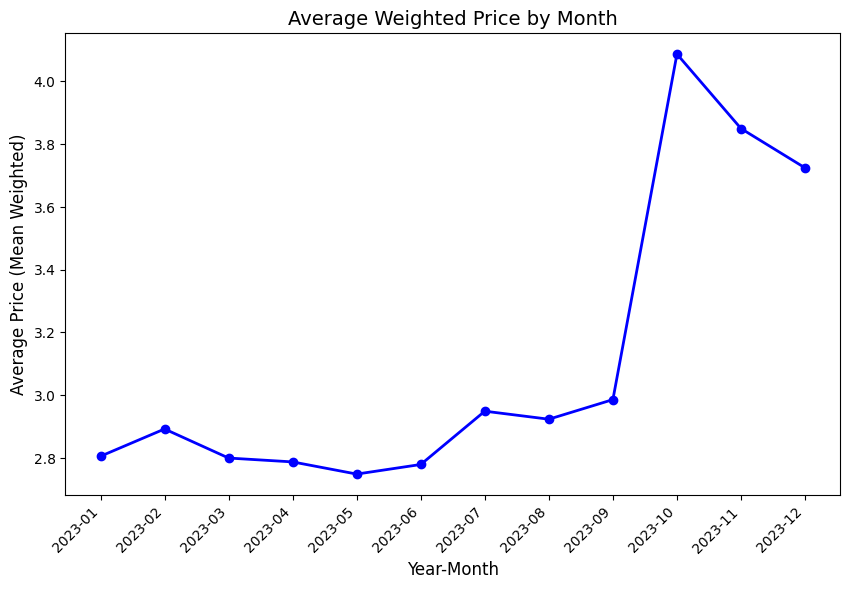

In [17]:
# Group by 'year_month' and calculate the mean 'mean_weighted_price'
monthly_avg_price = usda_df.groupby('year_month')['mean_weighted_price'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.title('Average Weighted Price by Month', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Price (Mean Weighted)', fontsize=12)

plt.xticks(rotation=45, ha='right', ticks=range(len(monthly_avg_price)), labels=monthly_avg_price.index)

Whoa... what the heck happened in October, 2023?! 

Let's take a more granular look at this by product.  

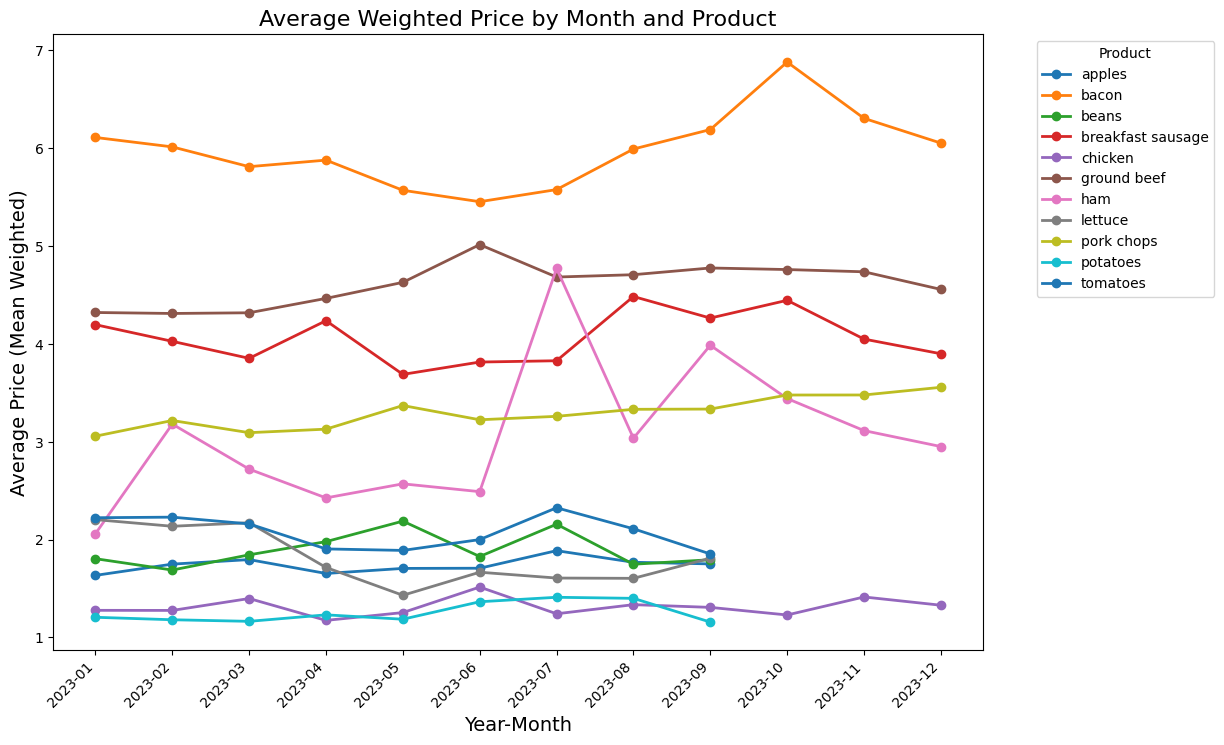

In [18]:
# Group by 'year_month' and 'product', then calculate the mean 'mean_weighted_price'
monthly_avg_price_by_product = usda_df.groupby(['year_month', 'product'])['mean_weighted_price'].mean().unstack()

# Create a line plot for each product
plt.figure(figsize=(12, 8))

# Plot each product as a separate line
monthly_avg_price_by_product.plot(kind='line', marker='o', linestyle='-', linewidth=2, ax=plt.gca())

# Add labels and title
plt.title('Average Weighted Price by Month and Product', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Price (Mean Weighted)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(ticks=range(len(monthly_avg_price_by_product.index)), labels=monthly_avg_price_by_product.index, rotation=45, ha='right')

# Ensure all months are shown
plt.locator_params(axis='x', nbins=len(monthly_avg_price_by_product.index))

# Show the legend to differentiate the products
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')


I don't see anything in the individual product data that would explain why there's that huge spike in the aggregated product data in October.  Need more info...

Is a single region driving the spike?

In [19]:
usda_df[usda_df['year_month'] == '2023-10'].groupby('region')['mean_weighted_price'].mean()

region
ALASKA                5.187653
HAWAII                4.432375
MIDWEST U.S.          3.714253
NATIONAL              3.933194
NORTHEAST U.S.        4.054160
NORTHWEST U.S.        4.051722
SOUTH CENTRAL U.S.    3.637093
SOUTHEAST U.S.        3.863836
SOUTHWEST U.S.        4.153484
Name: mean_weighted_price, dtype: float64

Are there any extreme outliers in October?

In [20]:
usda_df[usda_df['year_month'] == '2023-10']['mean_weighted_price'].describe()

count    50.000000
mean      4.086828
std       1.854891
min       0.982500
25%       3.101458
50%       4.161250
75%       4.702361
max       8.442500
Name: mean_weighted_price, dtype: float64

In [21]:
# Compute the IQR for October

october_prices = usda_df[usda_df['year_month'] == '2023-10']['mean_weighted_price']

Q1 = october_prices.quantile(0.25)
Q3 = october_prices.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = usda_df[(usda_df['year_month'] == '2023-10') & 
                    (usda_df['mean_weighted_price'] > upper_bound)]


# See which products or regions are affected
outliers.groupby(['product', 'region'])['mean_weighted_price'].count()

# Inspect those rows
outliers[['product', 'region', 'mean_weighted_price']]


,product,region,mean_weighted_price
626,bacon,ALASKA,8.4425
686,bacon,NORTHWEST U.S.,7.1125


Two rows shouldn't be able to drive a huge price spike in the overall data.  

How many reports are there for October, overall?  50, right?

In [22]:
usda_df[usda_df['year_month'] == '2023-10'].shape[0]

50

2 rows shouldn't skew 50 datapoints that much.  What other expensive products were there in October?

In [23]:
usda_df[usda_df['year_month'] == '2023-10'].groupby('product')['mean_weighted_price'].mean().sort_values(ascending=False)

product
bacon                6.880000
ground beef          4.759807
breakfast sausage    4.445556
pork chops           3.477570
ham                  3.441500
chicken              1.229722
Name: mean_weighted_price, dtype: float64

How does October compare to the previous month?

In [24]:
usda_df.groupby('year_month')['mean_weighted_price'].mean().tail(6)

year_month
2023-07    2.948772
2023-08    2.923202
2023-09    2.985663
2023-10    4.086828
2023-11    3.849505
2023-12    3.724132
Name: mean_weighted_price, dtype: float64

There does appear to be a spike in October compared to the previous month.  Was one product responsible?

In [25]:
usda_df[usda_df['year_month'] == '2023-10'].groupby('product')['mean_weighted_price'].mean()

product
bacon                6.880000
breakfast sausage    4.445556
chicken              1.229722
ground beef          4.759807
ham                  3.441500
pork chops           3.477570
Name: mean_weighted_price, dtype: float64

Were a disproportionate number of the reports for bacon (the highest-priced item)?

In [26]:
usda_df.groupby(['year_month', 'product']).size().unstack()

product,apples,bacon,beans,breakfast sausage,chicken,ground beef,ham,lettuce,pork chops,potatoes,tomatoes
year_month,,,,,,,,,,,
2023-01,9.0,9.0,8.0,9.0,8.0,9.0,8.0,4.0,9.0,9.0,8.0
2023-02,9.0,9.0,7.0,9.0,8.0,9.0,7.0,4.0,9.0,9.0,9.0
2023-03,9.0,9.0,8.0,9.0,9.0,9.0,8.0,4.0,9.0,9.0,9.0
2023-04,9.0,9.0,8.0,9.0,8.0,9.0,9.0,4.0,9.0,9.0,9.0
2023-05,9.0,9.0,8.0,8.0,8.0,9.0,7.0,5.0,9.0,9.0,9.0
2023-06,9.0,9.0,8.0,8.0,9.0,9.0,5.0,6.0,9.0,9.0,9.0
2023-07,9.0,9.0,9.0,8.0,9.0,9.0,5.0,5.0,9.0,9.0,9.0
2023-08,9.0,9.0,7.0,9.0,9.0,9.0,4.0,6.0,9.0,9.0,9.0
2023-09,9.0,9.0,7.0,9.0,9.0,9.0,4.0,3.0,9.0,9.0,8.0


Ah... there's the answer.  We're missing reports on fresh produce items like apples, beans, lettuce, potatoes, and tomatoes in October (and November and December).  So... now what to do about that?  Looking back, I should've noticed that in the line chart that visualized each product separately! 

In [41]:
# Export dataset
usda_df.to_csv('usda_final.csv', index=False)

### vi. Takeaways
* We have a 3-month reporting gap in ~50% of the products / one whole "category" of products - fresh produce.  Should I impute data for them?  Should I only compare the same months from the BLS CPI and USDA ARF datasets for these products? 

## C. Inflation Trend Data

In [50]:
# Create dataframe from bls_final.csv
blscpi_df = pd.read_csv('bls_cpi_final.csv')

# Preview
blscpi_df.drop('Unnamed: 0', axis=1, inplace=True)

blscpi_df.head()

,product,unadjusted_percent_change_2023
0,food,2.7
1,food at home,1.3
2,flour,2.2
3,cereal,0.3
4,rice,0.1


Looks like I missed the step of cleaning out everything from this dataset that doesn't match the USDA dataset.

In [51]:
# What all products are currently listed in this dataframe?

blscpi_df['product'].unique().tolist()

['food',
 'food at home',
 'flour',
 'cereal',
 'rice',
 'bakery',
 'bread',
 'cookies',
 'beef and veal',
 'ground beef',
 'pork',
 'bacon',
 'bkfst sausage',
 'ham',
 'pork chops',
 'poultry',
 'chicken',
 'whole chicken',
 'fish',
 'fresh fish',
 'frozen fish',
 'eggs',
 'milk',
 'cheese',
 'ice cream',
 'fresh fruits',
 'apples',
 'bananas',
 'citrus fruits',
 'fresh vegetables',
 'potatoes',
 'lettuce',
 'tomatoes',
 'canned vegetables',
 'frozen vegetables',
 'beans',
 'coffee',
 'butter',
 'peanut butter',
 'food away from home',
 'food from vending machines and mobile vendors']

In [48]:
# And what was the list of products in the usda_df?
usda_df['product'].unique().tolist()

['apples',
 'beans',
 'chicken',
 'ground beef',
 'lettuce',
 'breakfast sausage',
 'pork chops',
 'bacon',
 'ham',
 'potatoes',
 'tomatoes']

In [54]:
# Filter to match usda_df product list.  usda_df was filtered to reference "whole chicken", so 
# do the same here for accurate comparison. 
blscpi_df = blscpi_df[
    blscpi_df['product'].isin(usda_df['product']) | (blscpi_df['product'] == 'whole chicken')
]

# Remove simple "chicken" from the filtered results
blscpi_df = blscpi_df[blscpi_df['product'] != 'chicken']

# Rename "whole chicken" to "chicken"
blscpi_df['product'] = blscpi_df['product'].replace('whole chicken', 'chicken')

# Verify result
blscpi_df['product'].unique().tolist()

['ground beef',
 'bacon',
 'ham',
 'pork chops',
 'chicken',
 'apples',
 'potatoes',
 'lettuce',
 'tomatoes',
 'beans']

### PAUSE:
* I need to pause here and think for a moment.  This dataset originally had monthly "indexes," which I didn't think were very useful, because they didn't give me a % change.  However, I'm wondering if having a monthly metric to compare prices as reported monthly in the usda_df might be useful.  Perhaps I could figure out a way to make those indexes useful.  Need to mull this problem over. 

### i. Clean again

In [69]:
blscpi_df = pd.read_excel('cpi-u-202312.xlsx')

blscpi_df.head()

,Product,Dec 22 Index,Jan 23 Index,Feb 23 Index,Mar 23 Index,Apr 23 Index,May 23 Index,Jun 23 Index,Jul 23 Index,Aug 23 Index,Sep 23 Index,Oct 23 Index,Nov 23 Index,Dec 23 Index,Dec 22 Dec 23 Percent Change
0,All items,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,Food,316.839,319.136,320.569,320.863,321.566,322.249,322.556,323.523,324.100,324.704,325.731,325.172,325.409,2.7
2,Gound Beef,330.548,329.943,330.661,331.897,333.806,340.629,346.066,351.379,352.959,355.019,360.211,354.917,352.556,6.7
3,Breakfast Sausage,185.061,188.373,188.754,188.884,185.367,185.878,185.751,187.793,185.242,184.066,184.488,179.105,178.159,-3.7
4,Ham,262.125,276.587,287.536,282.867,275.974,287.708,287.550,288.923,290.800,287.885,288.813,275.317,268.563,2.5


In [70]:
# Normalize column headers

blscpi_df.columns = [col.replace(" ", "_").replace("-", "").lower() for col in blscpi_df.columns]

blscpi_df.head()

,product,dec_22_index,jan_23_index,feb_23_index,mar_23_index,apr_23_index,may_23_index,jun_23_index,jul_23_index,aug_23_index,sep_23_index,oct_23_index,nov_23_index,dec_23_index,dec_22_dec_23_percent_change
0,All items,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,Food,316.839,319.136,320.569,320.863,321.566,322.249,322.556,323.523,324.100,324.704,325.731,325.172,325.409,2.7
2,Gound Beef,330.548,329.943,330.661,331.897,333.806,340.629,346.066,351.379,352.959,355.019,360.211,354.917,352.556,6.7
3,Breakfast Sausage,185.061,188.373,188.754,188.884,185.367,185.878,185.751,187.793,185.242,184.066,184.488,179.105,178.159,-3.7
4,Ham,262.125,276.587,287.536,282.867,275.974,287.708,287.550,288.923,290.800,287.885,288.813,275.317,268.563,2.5


In [71]:
# Normalize product column values

blscpi_df['product'] = blscpi_df['product'].str.lower()

blscpi_df.head()

,product,dec_22_index,jan_23_index,feb_23_index,mar_23_index,apr_23_index,may_23_index,jun_23_index,jul_23_index,aug_23_index,sep_23_index,oct_23_index,nov_23_index,dec_23_index,dec_22_dec_23_percent_change
0,all items,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,food,316.839,319.136,320.569,320.863,321.566,322.249,322.556,323.523,324.100,324.704,325.731,325.172,325.409,2.7
2,gound beef,330.548,329.943,330.661,331.897,333.806,340.629,346.066,351.379,352.959,355.019,360.211,354.917,352.556,6.7
3,breakfast sausage,185.061,188.373,188.754,188.884,185.367,185.878,185.751,187.793,185.242,184.066,184.488,179.105,178.159,-3.7
4,ham,262.125,276.587,287.536,282.867,275.974,287.708,287.550,288.923,290.800,287.885,288.813,275.317,268.563,2.5


In [72]:
# Export to csv

blscpi_df.to_csv('bls_cpi_final.csv')

### Takeaway: 
* I actually think this table is now more usable.  Monthly indexes will give me something to plot against montly prices in the usda_df.  Good deal! 

### ii. Regional data

Upon further reflection, I found myself wondering if the regional data contained in the second sheet of this dataset might be useful, since the data in the usda_df is reported regionally.  I'm not sure, yet, but I want to take a further look at the regional data, just in case.

In [75]:
blsreg_df = pd.read_excel('cpi-u-202312-regional.xlsx')

blsreg_df.head()

,Area,Dec 22 Index,Jan 23 Index,Feb 23 Index,Mar 23 Index,Apr 23 Index,May 23 Index,Jun 23 Index,Jul 23 Index,Aug 23 Index,Sep 23 Index,Oct 23 Index,Nov 23 Index,Dec 23 Index,Dec 22 Dec 23 Percent Change
0,U.S. city average,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,Northeast,308.150,310.323,311.986,311.243,311.848,312.241,313.329,313.952,315.441,316.373,316.300,316.252,316.143,2.6
2,Midwest,275.182,277.332,278.672,280.330,281.927,282.656,283.741,284.640,285.122,285.276,284.981,284.539,283.908,3.2
3,South,288.205,290.438,292.285,293.358,295.315,295.889,296.789,297.279,298.975,299.657,299.394,298.930,298.754,3.7
4,West,314.599,317.477,319.130,320.715,322.187,323.525,324.448,324.865,326.234,327.491,327.708,326.299,325.932,3.6


In [76]:
# Normalize column headers

blsreg_df.columns = [col.replace(" ", "_").replace("-", "").lower() for col in blsreg_df.columns]

blsreg_df.head()

,area,dec_22_index,jan_23_index,feb_23_index,mar_23_index,apr_23_index,may_23_index,jun_23_index,jul_23_index,aug_23_index,sep_23_index,oct_23_index,nov_23_index,dec_23_index,dec_22_dec_23_percent_change
0,U.S. city average,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,Northeast,308.150,310.323,311.986,311.243,311.848,312.241,313.329,313.952,315.441,316.373,316.300,316.252,316.143,2.6
2,Midwest,275.182,277.332,278.672,280.330,281.927,282.656,283.741,284.640,285.122,285.276,284.981,284.539,283.908,3.2
3,South,288.205,290.438,292.285,293.358,295.315,295.889,296.789,297.279,298.975,299.657,299.394,298.930,298.754,3.7
4,West,314.599,317.477,319.130,320.715,322.187,323.525,324.448,324.865,326.234,327.491,327.708,326.299,325.932,3.6


In [78]:
# Normalize product column values

blsreg_df['area'] = blsreg_df['area'].str.lower()

blsreg_df.head()

,area,dec_22_index,jan_23_index,feb_23_index,mar_23_index,apr_23_index,may_23_index,jun_23_index,jul_23_index,aug_23_index,sep_23_index,oct_23_index,nov_23_index,dec_23_index,dec_22_dec_23_percent_change
0,u.s. city average,296.797,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746,3.4
1,northeast,308.150,310.323,311.986,311.243,311.848,312.241,313.329,313.952,315.441,316.373,316.300,316.252,316.143,2.6
2,midwest,275.182,277.332,278.672,280.330,281.927,282.656,283.741,284.640,285.122,285.276,284.981,284.539,283.908,3.2
3,south,288.205,290.438,292.285,293.358,295.315,295.889,296.789,297.279,298.975,299.657,299.394,298.930,298.754,3.7
4,west,314.599,317.477,319.130,320.715,322.187,323.525,324.448,324.865,326.234,327.491,327.708,326.299,325.932,3.6


In [79]:
# Export to csv

blsreg_df.to_csv('bls_reg_final.csv')

### iii. BLS national EDA

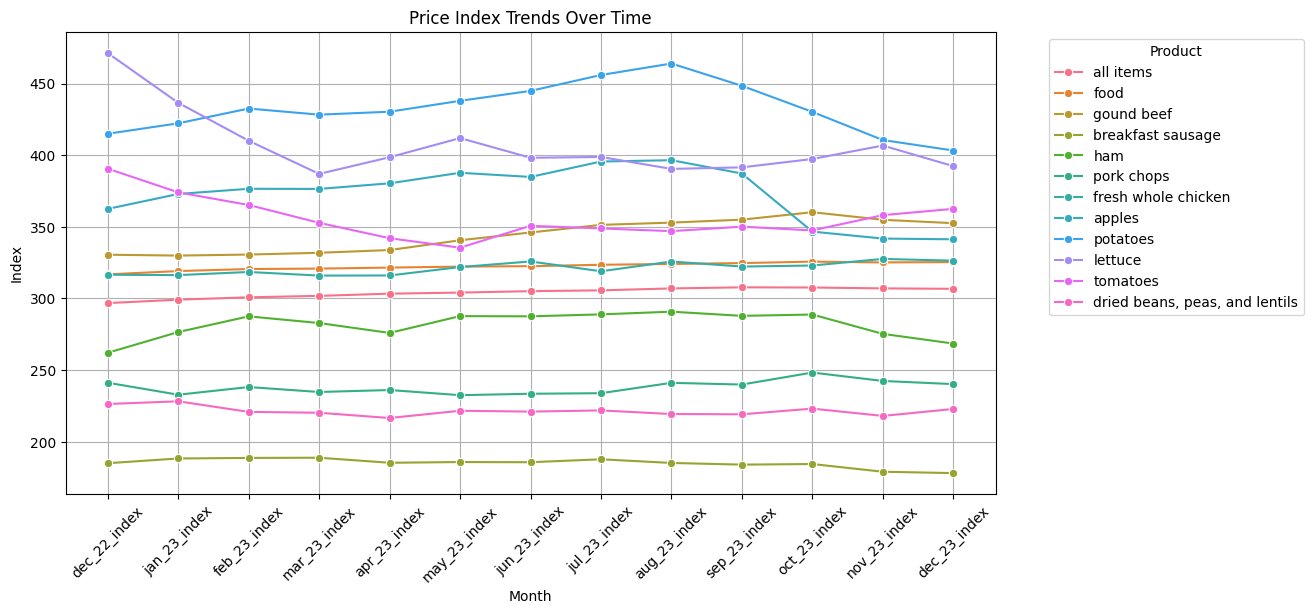

In [88]:
# Visualize how each product's index changed over time

# Plot the indexes by month.  Not the annual percent change. 
df_filtered = blscpi_df.drop(columns=["dec_22_dec_23_percent_change"])  # Remove the unwanted column

df_melted = df_filtered.melt(id_vars=["product"], var_name="Month", value_name="Index")  # Reshape


plt.figure(figsize=(12, 6))

sns.lineplot(data=df_melted, x="Month", y="Index", hue="product", marker="o")

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Index")
plt.title("Price Index Trends Over Time")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()



### iv. BLS regional EDA

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'dec-22'),
  Text(1, 0, 'jan-23'),
  Text(2, 0, 'feb-23'),
  Text(3, 0, 'mar-23'),
  Text(4, 0, 'apr-23'),
  Text(5, 0, 'may-23'),
  Text(6, 0, 'jun-23'),
  Text(7, 0, 'jul-23'),
  Text(8, 0, 'aug-23'),
  Text(9, 0, 'sep-23'),
  Text(10, 0, 'oct-23'),
  Text(11, 0, 'nov-23'),
  Text(12, 0, 'dec-23')])

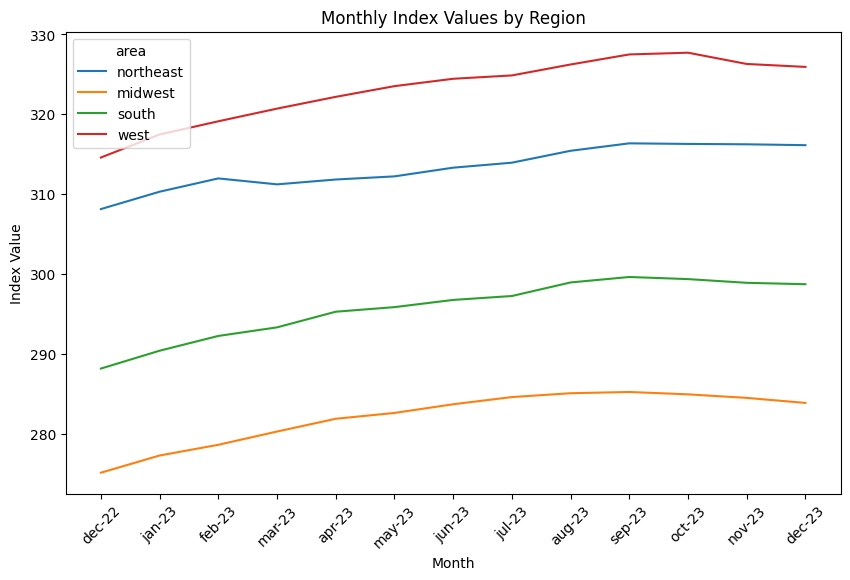

In [94]:
# Visualize how each region's indexes changed oer time

# Filter the data to only include the regions: Northeast, Midwest, South, West
regions = ['northeast', 'midwest', 'south', 'west']
df_filtered = blsreg_df[blsreg_df['area'].isin(regions)]

# Remove the 'dec_22_dec_23_percent_change' column
df_filtered = df_filtered.drop(columns=['dec_22_dec_23_percent_change'])

# Melting the DataFrame
df_melted = df_filtered.melt(id_vars=['area'], var_name='month', value_name='index_value')

# Convert month to a more usable format (optional)
df_melted['month'] = df_melted['month'].str.replace('_index', '').str.replace('_', '-')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='month', y='index_value', hue='area')

plt.title('Monthly Index Values by Region')
plt.xlabel('Month')
plt.ylabel('Index Value')
plt.xticks(rotation=45)